In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys
import numpy as np
import tensorflow as tf


from nets import *
from cfgs import *
from data import *
from trainer import *
from baseline import *

import matplotlib.pyplot as plt

In [2]:
cfg = m_3x1_sym_uniform_01_config.cfg
Generator = sym_uniform_01.Generator
%matplotlib inline
save_plot = True
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
D = 201
X_tst = np.tile(np.linspace(0, 1.0, D)[:, np.newaxis], cfg.num_agents)

In [3]:
cfg.test.batch_size = D
cfg.test.num_batches = int(X_tst.shape[0]/cfg.test.batch_size)
cfg.test.save_output = True

In [4]:
net = net.Net(cfg, "test")
generator = Generator(cfg, 'test', X_tst)
m = trainer.Trainer(cfg, "test", net)
m.test(generator)

INFO:tensorflow:Restoring parameters from experiments/m_3x1_sym_uniform_01/model-40000


2019-02-02 14:29:18,481:INFO:Restoring parameters from experiments/m_3x1_sym_uniform_01/model-40000
2019-02-02 14:29:21,258:INFO:TEST BATCH-0: t = 2.7480, Net_Loss: -0.375510, Revenue: 0.375510
2019-02-02 14:29:21,260:INFO:TEST ALL-40000: t = 2.7480, Net_Loss: -0.375510, Revenue: 0.375510


In [5]:
alloc = np.load(os.path.join(cfg.dir_name, "alloc_tst_" + str(cfg.test.restore_iter) + ".npy"))
pay = np.load(os.path.join(cfg.dir_name, "pay_tst_" + str(cfg.test.restore_iter) + ".npy"))
vv = np.load(os.path.join(cfg.dir_name, "vv_tst_" + str(cfg.test.restore_iter) + ".npy"))

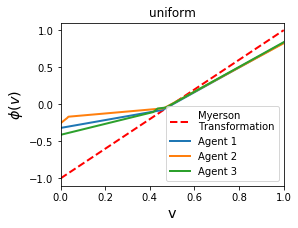

In [6]:
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (8, 6))

vv_true = plt.plot(X_tst[:, 0], baseline.OptRevOneItem(cfg, X_tst).compute_vv(X_tst[:, 0], 0), 
                   c = "r", linewidth = 2, linestyle = '--', label = "Myerson\nTransformation")
for i in range(cfg.num_agents):
    plt.plot(X_tst[:, i], vv[:, i], linewidth = 2, linestyle = '-', label = 'Agent ' + str(i+1)) 
plt.xlabel('v')
plt.ylabel('$\phi(v)$')
plt.title("uniform")
plt.xlim(X_tst[0,0], X_tst[-1,0])

plt.legend(loc=4)

if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'phi.pdf'), bbox_inches = 'tight', pad_inches = 0.05)